In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# First Training

In [2]:
history_df_01 = pd.read_csv('fine-tuning-albert-history-01.csv')

In [3]:
history_df_02 = pd.read_csv('fine-tuning-albert-history-01-fine-tuned.csv')

In [4]:
history_df = pd.concat([history_df_01, history_df_02])
history_df = history_df.reset_index(drop=True)
history_df

,Unnamed: 0,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,0,2.230836,1.493598,1.077139,1.037853
1,1,1.559718,1.248887,0.933539,0.966198
2,2,1.428831,1.195337,0.833126,0.912757
3,3,1.368442,1.169804,0.826941,0.909363
4,4,1.314464,1.146501,0.795601,0.891965
5,5,1.254155,1.119891,0.747190,0.864401
6,6,1.219375,1.104253,0.751084,0.866651
7,7,1.172372,1.082761,0.762286,0.873090
8,8,1.137061,1.066330,0.755384,0.869129
9,9,1.106136,1.051730,0.776710,0.881311


In [5]:
train_df = history_df[['loss']]

In [6]:
val_df = history_df[['val_loss']]

In [7]:
val_df.head()

,val_loss
0,1.077139
1,0.933539
2,0.833126
3,0.826941
4,0.795601


In [8]:
df = train_df.join(val_df['val_loss'])

In [9]:
df

,loss,val_loss
0,2.230836,1.077139
1,1.559718,0.933539
2,1.428831,0.833126
3,1.368442,0.826941
4,1.314464,0.795601
5,1.254155,0.747190
6,1.219375,0.751084
7,1.172372,0.762286
8,1.137061,0.755384
9,1.106136,0.776710


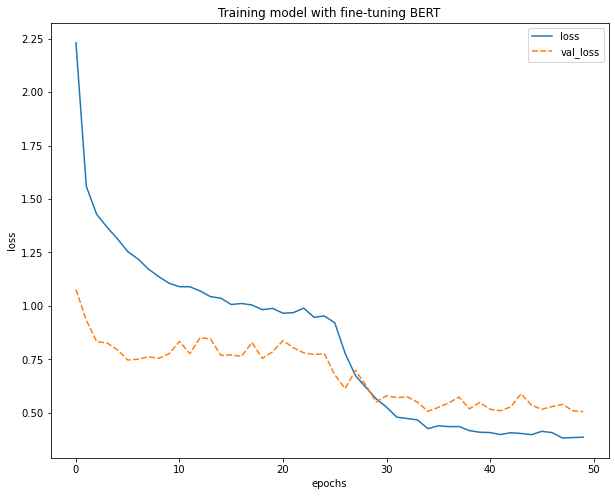

In [10]:
plt.figure(figsize=(10, 8))
ax = sns.lineplot(data=df)
ax.set(xlabel='epochs', ylabel='loss')
ax.set_title('Training model with fine-tuning BERT')
plt.show()